##  Machine Learning PROJECT 2
### GROUP 11
### Group Members :
**Chirag Hamirani**
**Vedant Taneja**

# <font color='red'> Classification

### Dataset: Description and Details

**Link** : https://www.kaggle.com/jpacse/datasets-for-churn-telecom*

**Description** :  Telecommunication companies face a problem of churning of their customers for other companies. In this dataset,we look at different scenarios in which customers are most likely to leave their current company. 
    
**Initial Analysis**:  Dataset is supposed to have few missing values and some pre-processed columns. These columns will first be converted to view their original data and processed as per teachings of the course.

**Project Objective : Project 1** : Data has attributes like MonthlyRevenue, MonthlyMinutes, ThreewayCalls, OverageMinutes, BlockedCalls,DropedCalls. These features might correspond to whether a customer will churn or not. Our objective is to:
* Initializations: Process data correctly to reflect right data impute missing values if required
* Preprocessing: Preprocess data for our machine learning models
* Data Visualization
* Apply ML Classification Models:
  1. KNN Classifier
  2. Logistic Regression
  3. LinearSVC
  4. Kernalized SVC (linear, rbf, poly)
  5. DecisionTree
* GridSearchCV for best parameters
* Cross-Validaiton to find average training and test scores
* Best Classifier with best parameters

**Project Objective : Project 2** : We'll continue implementing new algorithms and adding to main comparison table for accuracy. We'll apply PCA and reiterate previously run models for checking improvement in accuracy. Focussed implementation includes:
* Applying two voting classifiers - one with hard voting and one with soft voting
* Applying any two models with bagging and any two models with pasting.
* Applying any two models with adaboost boosting
* Applying one model with gradient boosting
* Applying PCA on data and then apply all the models in project 1 again on data you get from PCA. Comparing our results with  results in project 1.
* Apply deep learning models covered in class


# <font color='red'> Project Phase 1

## Importing all the important libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA



In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [3]:
churn = pd.read_csv('cell2celltrain.csv')

## Creating a Sample from our dataset
#### And throughout this project we will be working with this sample.

In [4]:
churn.shape

(51047, 58)

In [4]:
churn.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [5]:
churn.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [5]:
churn1 = churn.sample(n = 5000, random_state = 42)

## Preprocessing the data

In [7]:
churn1.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue                20
MonthlyMinutes                20
TotalRecurringCharge          20
DirectorAssistedCalls         20
OverageMinutes                20
RoamingCalls                  20
PercChangeMinutes             38
PercChangeRevenues            38
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                    4
Handsets                       0
HandsetModels                  0
CurrentEquipmentDays           0
AgeHH1    

### Since, there is not enough Null Values in the data. We insert some null values into the data

In [6]:
churn1['MonthlyRevenue'] = churn1['MonthlyRevenue'].sample(frac=.99)
churn1['MonthlyMinutes'] = churn1['MonthlyMinutes'].sample(frac=.99)
churn1['TotalRecurringCharge'] = churn1['TotalRecurringCharge'].sample(frac=.99)
churn1['OverageMinutes'] = churn1['OverageMinutes'].sample(frac=.99)



### Imputing the null values with the mean of the particular columns.

In [7]:
churn1['MonthlyRevenue'] = churn1['MonthlyRevenue'].fillna(value = churn1['MonthlyRevenue'].mean())
churn1['MonthlyMinutes'] = churn1['MonthlyMinutes'].fillna(value = churn1['MonthlyMinutes'].mean())
churn1['TotalRecurringCharge'] = churn1['TotalRecurringCharge'].fillna(value = churn1['TotalRecurringCharge'].mean())
churn1['DirectorAssistedCalls'] = churn1['DirectorAssistedCalls'].fillna(value = churn1['DirectorAssistedCalls'].mean())
churn1['OverageMinutes'] = churn1['OverageMinutes'].fillna(value = churn1['OverageMinutes'].mean())
churn1['RoamingCalls'] = churn1['RoamingCalls'].fillna(value = churn1['RoamingCalls'].mean())
churn1['MonthlyRevenue'] = churn1['MonthlyRevenue'].fillna(value = churn1['MonthlyRevenue'].mean())
churn1['PercChangeMinutes'] = churn1['PercChangeMinutes'].fillna(value = churn1['PercChangeMinutes'].mean())
churn1['PercChangeRevenues'] = churn1['PercChangeRevenues'].fillna(value = churn1['PercChangeRevenues'].mean())
churn1['AgeHH1'] = churn1['AgeHH1'].fillna(value = churn1['AgeHH1'].mean())
churn1['AgeHH2'] = churn1['AgeHH2'].fillna(value = churn1['AgeHH2'].mean())



### Converting the categorical variables to nominal data

In [8]:
churn1['HasCreditCard'].value_counts()

Yes    3373
No     1627
Name: HasCreditCard, dtype: int64

Changing Yes to 1 and No to 0 in HasCreditCard column

In [9]:
churn1['HasCreditCard'] = np.where((churn1.HasCreditCard == "Yes"),1,churn1.HasCreditCard)
churn1['HasCreditCard'] = np.where((churn1.HasCreditCard == "No"),0,churn1.HasCreditCard)

In [10]:
churn1['NewCellphoneUser'].value_counts()

No     4059
Yes     941
Name: NewCellphoneUser, dtype: int64

Changing Yes to 0 and No to 1 in NewCellphoneUser column

In [11]:
churn1['NewCellphoneUser'] = np.where((churn1.NewCellphoneUser == "Yes"),0,churn1.NewCellphoneUser)
churn1['NewCellphoneUser'] = np.where((churn1.NewCellphoneUser == "No"),1,churn1.NewCellphoneUser)

In [12]:
churn1['CreditRating'].value_counts()

2-High       1835
3-Good        845
1-Highest     819
5-Low         652
4-Medium      524
7-Lowest      217
6-VeryLow     108
Name: CreditRating, dtype: int64

In [13]:
churn1['CreditRating'] = np.where((churn1.CreditRating == "1-Highest"),1,churn1.CreditRating)
churn1['CreditRating'] = np.where((churn1.CreditRating == "2-High"),2,churn1.CreditRating)
churn1['CreditRating'] = np.where((churn1.CreditRating == "3-Good"),3,churn1.CreditRating)
churn1['CreditRating'] = np.where((churn1.CreditRating == "4-Medium"),4,churn1.CreditRating)
churn1['CreditRating'] = np.where((churn1.CreditRating == "5-Low"),5,churn1.CreditRating)
churn1['CreditRating'] = np.where((churn1.CreditRating == "6-VeryLow"),6,churn1.CreditRating)
churn1['CreditRating'] = np.where((churn1.CreditRating == "7-Lowest"),7,churn1.CreditRating)


In [14]:
churn1.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
14589,3114822,No,34.430000,314.0,30.0,0.00,5.0,2.6,-12.0,-1.2,...,0,5,No,0,Unknown,No,2,Rural,Professional,Yes
5048,3039574,No,30.000000,153.0,30.0,0.00,0.0,0.0,10.0,0.0,...,0,4,Yes,1,Unknown,No,3,Other,Other,No
7616,3059830,Yes,61.110000,328.0,57.0,0.99,22.0,0.0,-328.0,-6.5,...,0,5,No,0,30,No,3,Rural,Professional,Yes
30623,3243582,Yes,58.837759,350.0,10.0,0.00,1.0,0.0,-150.0,-0.3,...,0,7,No,0,Unknown,No,2,Other,Homemaker,Yes
11037,3087070,No,30.250000,174.0,30.0,0.25,0.0,0.0,56.0,-0.2,...,0,8,No,0,30,No,2,Other,Professional,Yes


In [15]:
churn1['Occupation'].value_counts()

Other           3656
Professional     909
Crafts           153
Clerical          99
Self              87
Retired           58
Student           27
Homemaker         11
Name: Occupation, dtype: int64

In [16]:
churn1['Occupation'] = np.where((churn1.Occupation == "Professional"),1,churn1.Occupation)
churn1['Occupation'] = np.where((churn1.Occupation == "Crafts"),2,churn1.Occupation)
churn1['Occupation'] = np.where((churn1.Occupation == "Clerical"),3,churn1.Occupation)
churn1['Occupation'] = np.where((churn1.Occupation == "Self"),4,churn1.Occupation)
churn1['Occupation'] = np.where((churn1.Occupation == "Retired"),5,churn1.Occupation)
churn1['Occupation'] = np.where((churn1.Occupation == "Student"),6,churn1.Occupation)
churn1['Occupation'] = np.where((churn1.Occupation == "Homemaker"),7,churn1.Occupation)
churn1['Occupation'] = np.where((churn1.Occupation == "Other"),8,churn1.Occupation)


In [17]:
priz = pd.get_dummies(churn1['PrizmCode'])

In [18]:
churn1 = pd.concat([churn1,priz], axis = 1)

In [19]:
churn1.drop(['PrizmCode'], axis = 1, inplace = True )

In [20]:
churn1['MadeCallToRetentionTeam'] = np.where((churn1.MadeCallToRetentionTeam == "Yes"),0,churn1.MadeCallToRetentionTeam)
churn1['MadeCallToRetentionTeam'] = np.where((churn1.MadeCallToRetentionTeam == "No"),1,churn1.MadeCallToRetentionTeam)

In [21]:
churn1['NotNewCellphoneUser'] = np.where((churn1.NotNewCellphoneUser == "Yes"),0,churn1.NotNewCellphoneUser)
churn1['NotNewCellphoneUser'] = np.where((churn1.NotNewCellphoneUser == "No"),1,churn1.NotNewCellphoneUser)

In [22]:
churn1['OwnsMotorcycle'] = np.where((churn1.OwnsMotorcycle == "Yes"),0,churn1.OwnsMotorcycle)
churn1['OwnsMotorcycle'] = np.where((churn1.OwnsMotorcycle == "No"),1,churn1.OwnsMotorcycle)

In [23]:
churn1['MaritalStatus'] = np.where((churn1.MaritalStatus == "Yes"),1,churn1.MaritalStatus)
churn1['MaritalStatus'] = np.where((churn1.MaritalStatus == "No"),0,churn1.MaritalStatus)
churn1['MaritalStatus'] = np.where((churn1.MaritalStatus == "Unknown"),0,churn1.MaritalStatus)

In [24]:
churn1['OwnsComputer'].value_counts()

No     4071
Yes     929
Name: OwnsComputer, dtype: int64

In [25]:
churn1['ChildrenInHH'] = np.where((churn1.ChildrenInHH == "Yes"),0,churn1.ChildrenInHH)
churn1['ChildrenInHH'] = np.where((churn1.ChildrenInHH == "No"),1,churn1.ChildrenInHH)

In [26]:
churn1['HandsetRefurbished'] = np.where((churn1.HandsetRefurbished == "Yes"),0,churn1.HandsetRefurbished)
churn1['HandsetRefurbished'] = np.where((churn1.HandsetRefurbished == "No"),1,churn1.HandsetRefurbished)

In [27]:
churn1['HandsetWebCapable'] = np.where((churn1.HandsetWebCapable == "Yes"),1,churn1.HandsetWebCapable)
churn1['HandsetWebCapable'] = np.where((churn1.HandsetWebCapable == "No"),0,churn1.HandsetWebCapable)

In [28]:
churn1['TruckOwner'] = np.where((churn1.TruckOwner == "Yes"),0,churn1.TruckOwner)
churn1['TruckOwner'] = np.where((churn1.TruckOwner == "No"),1,churn1.TruckOwner)

In [29]:
churn1['RVOwner'] = np.where((churn1.RVOwner == "Yes"),0,churn1.RVOwner)
churn1['RVOwner'] = np.where((churn1.RVOwner == "No"),1,churn1.RVOwner)

In [30]:
churn1['Homeownership'] = np.where((churn1.Homeownership == "Unknown"),0,churn1.Homeownership)
churn1['Homeownership'] = np.where((churn1.Homeownership == "Known"),1,churn1.Homeownership)

In [31]:
churn1['BuysViaMailOrder'] = np.where((churn1.BuysViaMailOrder == "Yes"),0,churn1.BuysViaMailOrder)
churn1['BuysViaMailOrder'] = np.where((churn1.BuysViaMailOrder == "No"),1,churn1.BuysViaMailOrder)

In [32]:
churn1['RespondsToMailOffers'] = np.where((churn1.RespondsToMailOffers == "Yes"),0,churn1.RespondsToMailOffers)
churn1['RespondsToMailOffers'] = np.where((churn1.RespondsToMailOffers == "No"),1,churn1.RespondsToMailOffers)

In [33]:
churn1['OptOutMailings'] = np.where((churn1.OptOutMailings == "Yes"),0,churn1.OptOutMailings)
churn1['OptOutMailings'] = np.where((churn1.OptOutMailings == "No"),1,churn1.OptOutMailings)

In [34]:
churn1['NonUSTravel'] = np.where((churn1.NonUSTravel == "Yes"),0,churn1.NonUSTravel)
churn1['NonUSTravel'] = np.where((churn1.NonUSTravel == "No"),1,churn1.NonUSTravel)

In [35]:
churn1['OwnsComputer'] = np.where((churn1.OwnsComputer == "Yes"),0,churn1.OwnsComputer)
churn1['OwnsComputer'] = np.where((churn1.OwnsComputer == "No"),1,churn1.OwnsComputer)

In [36]:
churn1['Churn'] = np.where((churn1.HasCreditCard == "Yes"),0,churn1.HasCreditCard)
churn1['Churn'] = np.where((churn1.HasCreditCard == "No"),1,churn1.HasCreditCard)

In [37]:
churn1.drop(['CustomerID', 'HandsetPrice','ServiceArea'], axis = 1, inplace = True)

In [38]:
churn1.dtypes

Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
Handsets                     float64
HandsetModels                float64
C

### Converting the data types of object columns to numeric for Correlation Matrix

In [39]:
churn1["Churn"] = pd.to_numeric(churn1["Churn"])
churn1["ChildrenInHH"] = pd.to_numeric(churn1["ChildrenInHH"])
churn1["HandsetRefurbished"] = pd.to_numeric(churn1["HandsetRefurbished"])
churn1["HandsetWebCapable"] = pd.to_numeric(churn1["HandsetWebCapable"])
churn1["TruckOwner"] = pd.to_numeric(churn1["TruckOwner"])
churn1["RVOwner"] = pd.to_numeric(churn1["RVOwner"])
churn1["RespondsToMailOffers"] = pd.to_numeric(churn1["RespondsToMailOffers"])
churn1["Homeownership"] = pd.to_numeric(churn1["Homeownership"])
churn1["BuysViaMailOrder"] = pd.to_numeric(churn1["BuysViaMailOrder"])
churn1["OptOutMailings"] = pd.to_numeric(churn1["OptOutMailings"])
churn1["NonUSTravel"] = pd.to_numeric(churn1["NonUSTravel"])
churn1["OwnsComputer"] = pd.to_numeric(churn1["OwnsComputer"])
churn1["HasCreditCard"] = pd.to_numeric(churn1["HasCreditCard"])
churn1["NewCellphoneUser"] = pd.to_numeric(churn1["NewCellphoneUser"])
churn1["NotNewCellphoneUser"] = pd.to_numeric(churn1["NotNewCellphoneUser"])
churn1["OwnsMotorcycle"] = pd.to_numeric(churn1["OwnsMotorcycle"])
churn1["MadeCallToRetentionTeam"] = pd.to_numeric(churn1["MadeCallToRetentionTeam"])
churn1["CreditRating"] = pd.to_numeric(churn1["CreditRating"])
churn1["Occupation"] = pd.to_numeric(churn1["Occupation"])
churn1["MaritalStatus"] = pd.to_numeric(churn1["MaritalStatus"])


### Correlation Matrix

In [34]:
churn1.corr()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,Occupation,MaritalStatus,Other,Rural,Suburban,Town
Churn,1.000000,-0.084886,-0.132776,-0.086929,-0.053987,-0.053193,-0.002923,-0.008308,0.002728,-0.075338,...,-0.068840,-0.000049,0.019133,-0.248930,-0.352369,0.433081,-0.157074,0.022709,0.115805,0.053371
MonthlyRevenue,-0.084886,1.000000,0.709899,0.645773,0.424185,0.787206,0.246839,-0.053496,-0.070376,0.456909,...,-0.019888,0.022246,-0.018503,0.134749,0.088211,-0.104607,0.058068,-0.013648,-0.025594,-0.039488
MonthlyMinutes,-0.132776,0.709899,1.000000,0.584022,0.379764,0.547548,0.100381,-0.055019,-0.079253,0.578921,...,0.000752,0.046852,-0.025307,0.212933,0.121086,-0.150920,0.106601,-0.037478,-0.051889,-0.058646
TotalRecurringCharge,-0.086929,0.645773,0.584022,1.000000,0.286247,0.195768,0.062198,-0.036971,-0.045149,0.363181,...,-0.001919,0.027183,0.008903,0.134307,0.078945,-0.084020,0.053794,-0.003264,-0.034094,-0.028334
DirectorAssistedCalls,-0.053987,0.424185,0.379764,0.286247,1.000000,0.297458,0.053137,-0.049940,-0.061613,0.259340,...,-0.008123,0.033432,-0.017139,0.100087,0.069816,-0.039177,0.046213,-0.017688,-0.014462,-0.035238
OverageMinutes,-0.053193,0.787206,0.547548,0.195768,0.297458,1.000000,0.038071,-0.050044,-0.122536,0.329123,...,-0.018623,0.010175,-0.021222,0.067625,0.058099,-0.077198,0.038156,-0.022980,-0.017329,-0.016995
RoamingCalls,-0.002923,0.246839,0.100381,0.062198,0.053137,0.038071,1.000000,0.023303,0.221590,0.102750,...,-0.080630,0.016804,-0.018265,0.009931,0.025126,-0.008859,-0.019436,0.018787,0.005051,0.009489
PercChangeMinutes,-0.008308,-0.053496,-0.055019,-0.036971,-0.049940,-0.050044,0.023303,1.000000,0.623319,-0.122939,...,-0.016416,-0.023783,0.042952,-0.047456,-0.009025,0.005264,0.006421,0.005157,-0.015826,0.008952
PercChangeRevenues,0.002728,-0.070376,-0.079253,-0.045149,-0.061613,-0.122536,0.221590,0.623319,1.000000,-0.057507,...,-0.038908,-0.002740,0.033862,-0.032433,-0.032284,0.011945,0.004517,0.007333,-0.006352,-0.002238
DroppedCalls,-0.075338,0.456909,0.578921,0.363181,0.259340,0.329123,0.102750,-0.122939,-0.057507,1.000000,...,0.013079,0.030357,-0.040985,0.216688,0.093092,-0.095045,0.102386,-0.028850,-0.043216,-0.069338


### Creating a Heatmap out of the data to find correlated columns

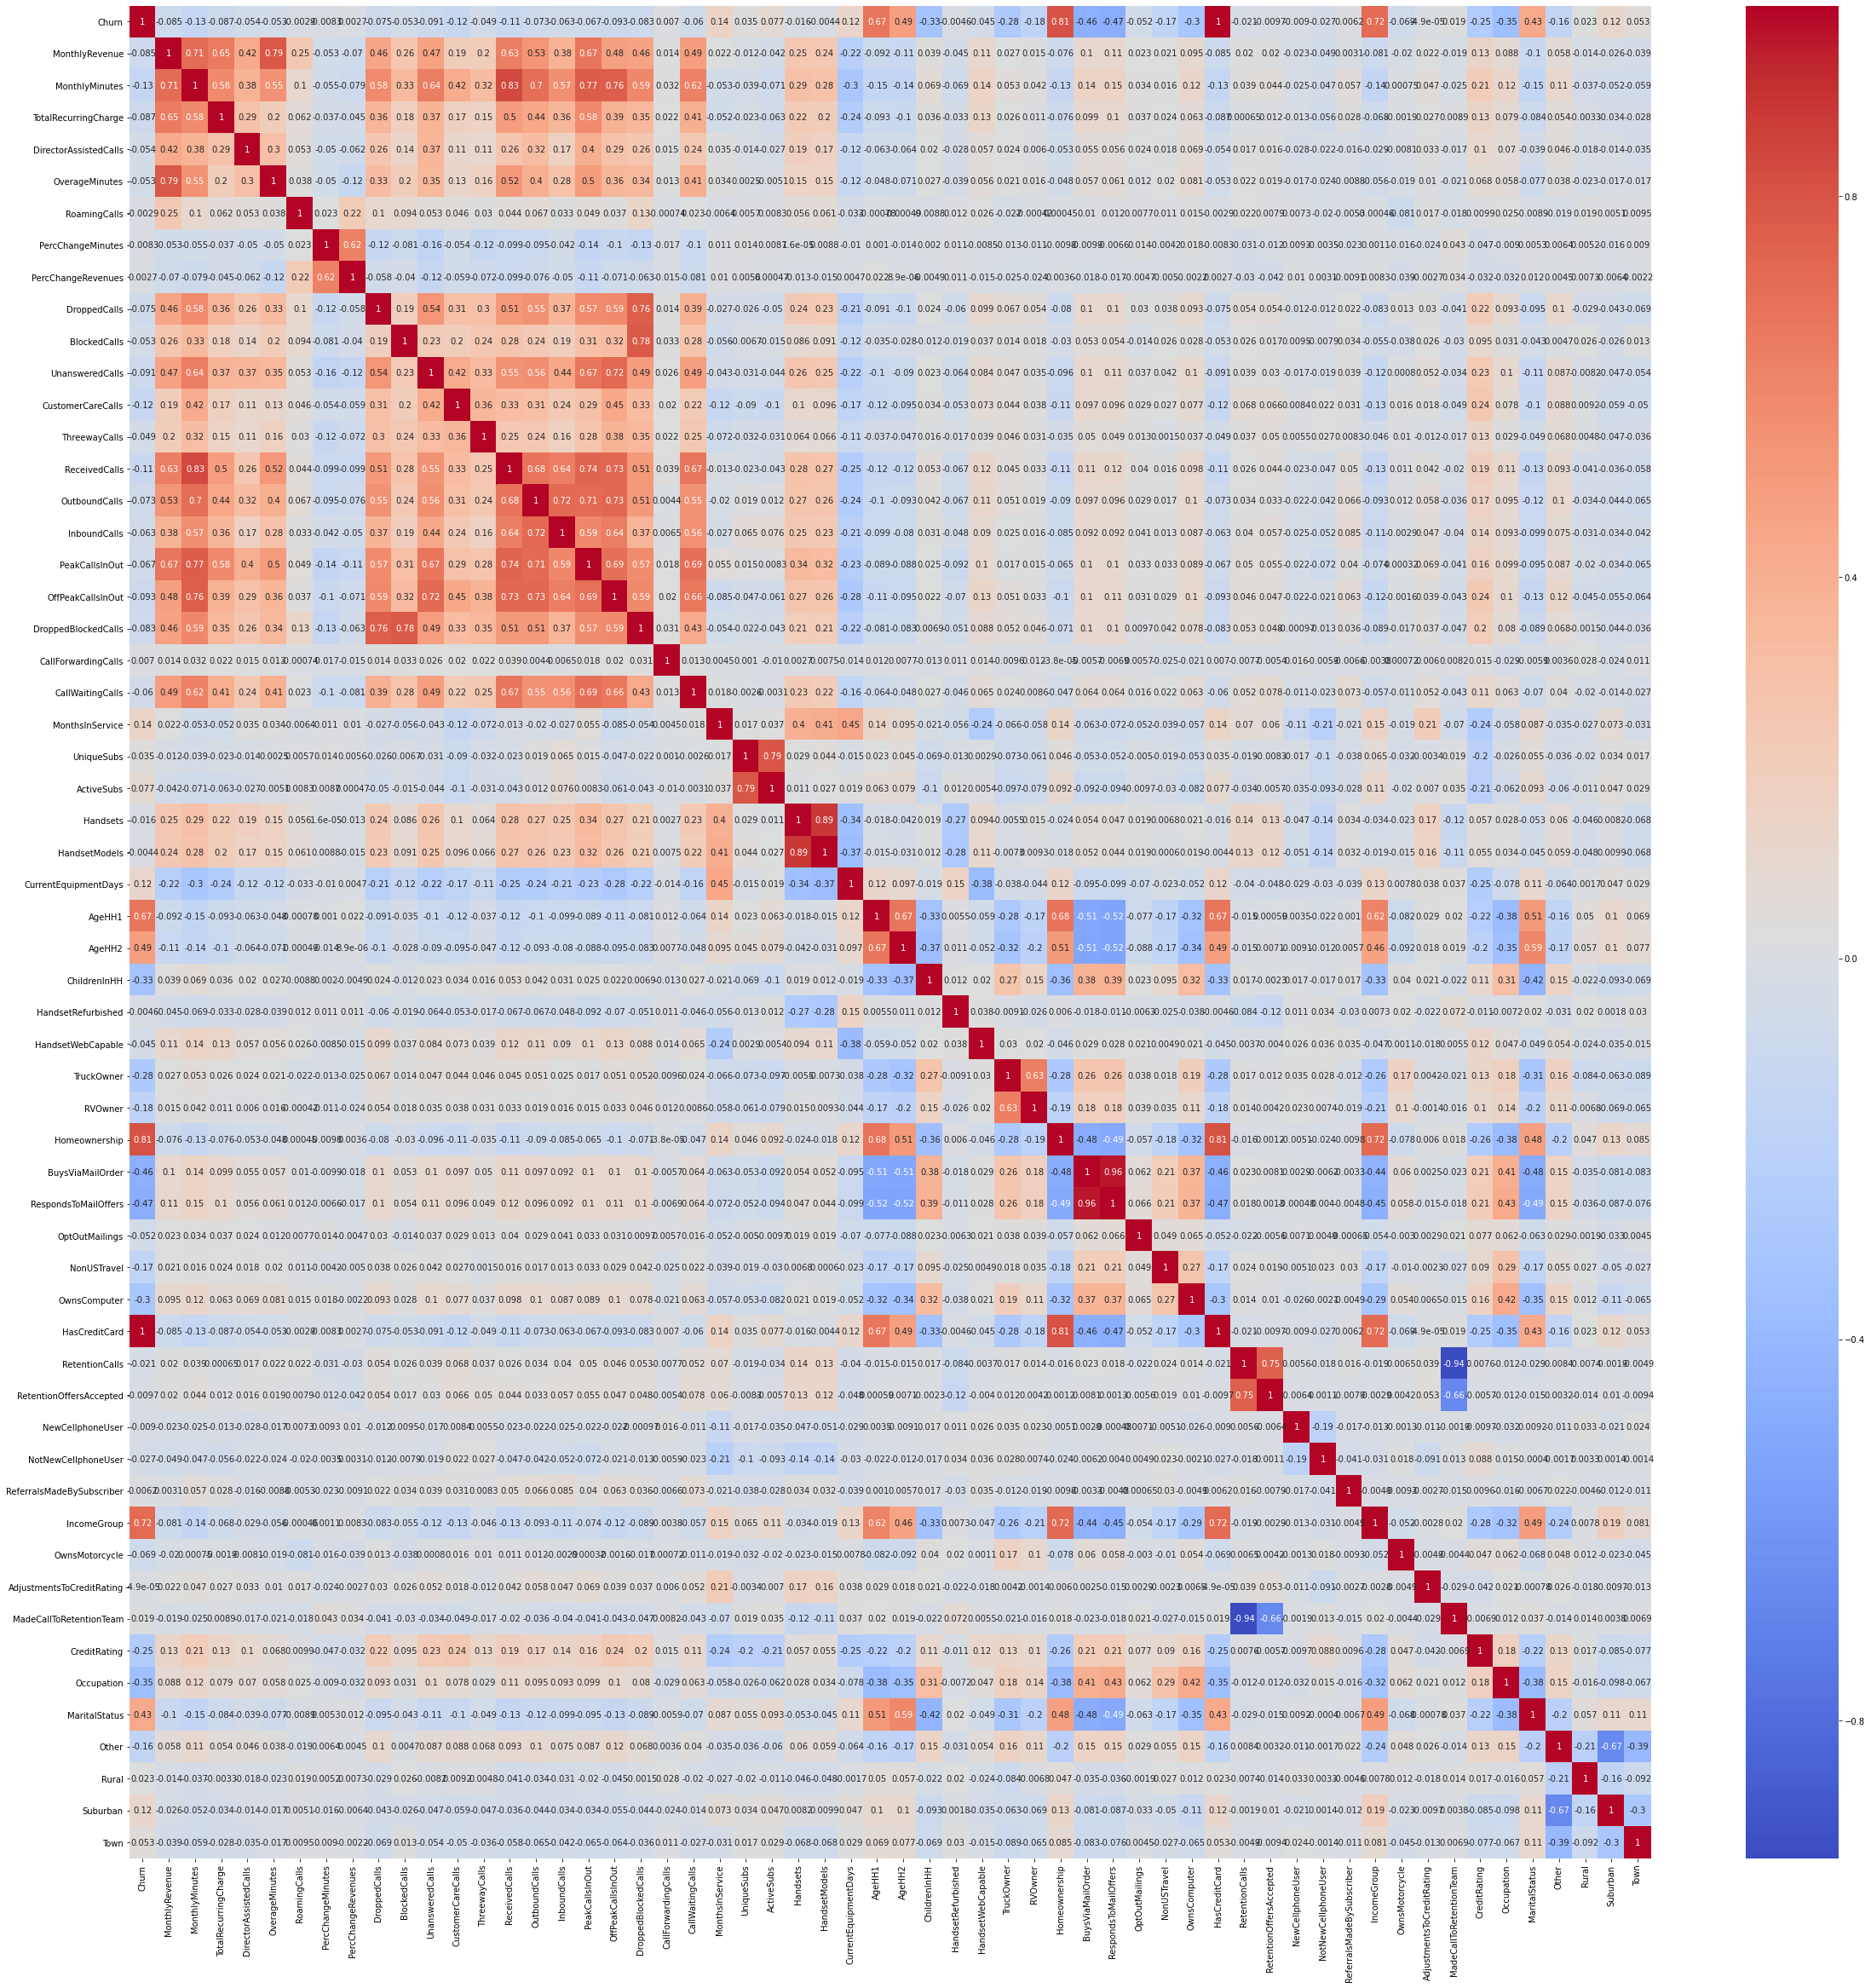

In [35]:
cr = churn1.corr()
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(data=cr, xticklabels=cr.columns, yticklabels=cr.columns, annot = True, cmap = 'coolwarm', ax=ax)

#### Feature Selection based on correlation

In [40]:
churn1.drop(['ReceivedCalls','OutboundCalls','PercChangeMinutes', 'PercChangeRevenues','MonthsInService','HasCreditCard','MaritalStatus','InboundCalls','PeakCallsInOut','OffPeakCallsInOut', 'DroppedBlockedCalls','CallWaitingCalls','CurrentEquipmentDays'], axis = 1, inplace = True)

### Splitting the Train Test data

In [41]:
# Dropping the Target Column
X = churn1.drop(['Churn'], axis = 1)  
# Target Column i.e Churn
y = churn1['Churn']

In [42]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 14589 to 47594
Data columns (total 45 columns):
Churn                        5000 non-null int64
MonthlyRevenue               5000 non-null float64
MonthlyMinutes               5000 non-null float64
TotalRecurringCharge         5000 non-null float64
DirectorAssistedCalls        5000 non-null float64
OverageMinutes               5000 non-null float64
RoamingCalls                 5000 non-null float64
DroppedCalls                 5000 non-null float64
BlockedCalls                 5000 non-null float64
UnansweredCalls              5000 non-null float64
CustomerCareCalls            5000 non-null float64
ThreewayCalls                5000 non-null float64
CallForwardingCalls          5000 non-null float64
UniqueSubs                   5000 non-null int64
ActiveSubs                   5000 non-null int64
Handsets                     5000 non-null float64
HandsetModels                5000 non-null float64
AgeHH1                     

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using StandardScaler to scale the data in both training and test data set

In [45]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## K Nearest Neighbors Classifier

In [47]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [49]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Train Score", knn.score(X_train, y_train))
print("Test Score", knn.score(X_test, y_test))


[[263  69]
 [ 66 602]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       332
           1       0.90      0.90      0.90       668

    accuracy                           0.86      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.86      0.86      0.86      1000

Train Score 1.0
Test Score 0.865


In [46]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

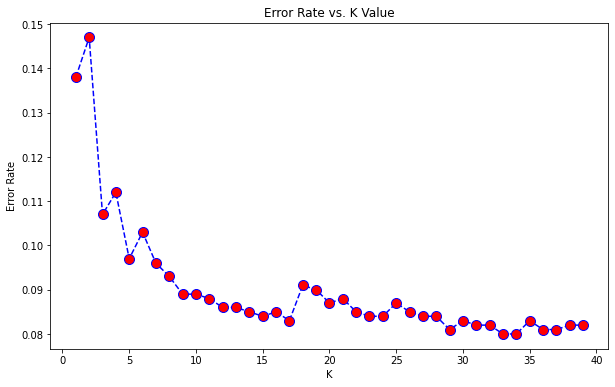

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Applying GridSearchCV in KNN for tuning the parameters

In [49]:
param_knn = {'n_neighbors': range(1,20)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Best Cross Validation Score
print("Best Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#Calculating the Cross Validation Scores
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))

#Mean Cross Validation Score
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

#Finding Best Parameters
print('KNN parameters: ', grid_knn.best_params_)

# Checking the test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))



Best Cross-validation score: 0.91

Cross-validation scores:
[0.92   0.915  0.9125 0.89   0.9075 0.9    0.9175 0.8975 0.9075 0.9075]
0.9075000000000001
KNN parameters:  {'n_neighbors': 9}
KNN Test Performance:  0.911


### CrossValidation in KNN

In [50]:
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print('Mean Cross-Validation : ', np.mean(scores))

Cross-validation scores:
[0.92   0.915  0.9125 0.89   0.9075 0.9    0.9175 0.8975 0.9075 0.9075]
Mean Cross-Validation :  0.9075000000000001


In [51]:
best_knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 9, weights = 'uniform', algorithm ='auto',p = 1)

best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

print('Train score: {:.4f}%'.format(best_knn.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(best_knn.score(X_test, y_test)*100))

Knn_f1_score = f1_score(y_test, grid_knn.predict(X_test))
print('f1 score : {:.4f} '.format(f1_score(y_test, grid_knn.predict(X_test))))

Train score: 92.2250%
Test score: 92.3000%
f1 score : 0.9350 


# LOGISTIC REGRESSION

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
print(classification_report(y_test,predictions))
print("Train Score", logmodel.score(X_train, y_train))
print("Test Score", logmodel.score(X_test, y_test))
cv_scores = cross_val_score(logmodel, X_train, y_train)


# Print Co-efficients
print("Logistic Coeficient : ", logmodel.coef_)
print("Logistic Intercept : ", logmodel.intercept_)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       332
           1       0.93      0.96      0.94       668

    accuracy                           0.92      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.92      0.92      0.92      1000

Train Score 0.9225
Test Score 0.923
Logistic Coeficient :  [[ 0.16270653  0.01276904 -0.18376187 -0.06967742 -0.15156283 -0.00533608
   0.05453836 -0.1184195   0.14019321 -0.05597272 -0.04720073  0.09916488
  -0.09827838  0.04165546 -0.1731546   0.19031496  0.49952579  0.16741015
   0.04714297 -0.02581715  0.00735191 -0.21995522  0.1246309   1.22407615
  -0.38103882  0.05752897  0.03727274 -0.27394014 -0.14727021 -0.16463334
  -0.03653875  0.06023125  0.00405164  0.06266079  1.16595021  0.01467737
  -0.044596   -0.15662132 -0.15714183 -0.03506308  0.1349999  -0.06526222
   0.01160713 -0.16451739]]
Logistic Intercept :  [1.58753537]


E:\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_mo

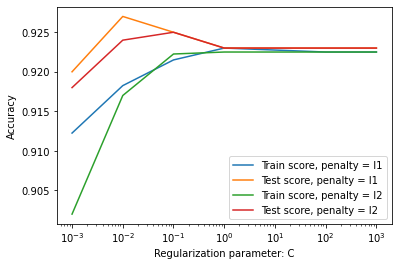

In [57]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [58]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
print('Train Score for L1',log_l1.score(X_train, y_train))
print('Test Score for L1',log_l1.score(X_test, y_test))

Train Score for L1 0.923
Test Score for L1 0.923


E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
log_l2 = LogisticRegression(penalty = 'l2', C = 1)
log_l2.fit(X_train, y_train)
print('Train Score for L2', log_l2.score(X_train, y_train))
print('Test Score for L2',log_l2.score(X_test, y_test))

Train Score for L2 0.9225
Test Score for L2 0.923


E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We are getting the best training and test score with penalty = L1 and C = 1

### GridSearchCV in LogisticRegression

In [60]:
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_mo

E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [61]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('KNN parameters: ', grid_search.best_params_)


Best Cross-validation score: 0.92
KNN parameters:  {'C': 0.1, 'penalty': 'l1'}


In [62]:
best_logistic = LogisticRegression(penalty ='l1', C = 1, max_iter = 7)

best_logistic.fit(X_train,y_train)
y_pred = best_logistic.predict(X_test)

print('Train score: {:.4f}%'.format(best_logistic.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(best_logistic.score(X_test, y_test)*100))

Logistic_f1_score = f1_score(y_test,best_logistic.predict(X_test))
print("f1 score: {:.2f}".format(f1_score(y_test,best_logistic.predict(X_test))))

Train score: 92.2500%
Test score: 92.3000%
f1 score: 0.94


E:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### CrossValidation in LogisticRegression

In [63]:
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print('Mean Cross-Validation : ', np.mean(scores))

Cross-validation scores:
[0.92   0.915  0.9125 0.89   0.9075 0.9    0.9175 0.8975 0.9075 0.9075]
Mean Cross-Validation :  0.9075000000000001


## Linear SVC

In [68]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score = []
test_score = []

for i in c_range:
    clf = LinearSVC(C = i)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
    

E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### GridSearchCV in LinearSVC

In [80]:
model = LinearSVC()
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: Co

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [83]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best LinearSVC parameters: ', grid_search.best_params_)


Best Cross-validation score: 0.91
Best LinearSVC parameters:  {'C': 0.001}


In [113]:
grid_search = LinearSVC(C = 0.001 ,max_iter = 54)
grid_search.fit(X_train, y_train)
y_pred_SVM = grid_search.predict(X_test)
 
print('Train score: {:.4f} %'.format(grid_search.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(grid_search.score(X_test, y_test)*100))

LinearSVC_f1_score = f1_score(y_test,grid_search.predict(X_test))
print("f1 score: {:.2f}".format(f1_score(y_test,grid_search.predict(X_test))))

Train score: 91.8250 %
Test score: 92.5000 %
f1 score: 0.94


### CrossValidation in LinearSVC

In [68]:
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(clf , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))

E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: Co

Cross-validation scores:
[0.86   0.845  0.9025 0.885  0.8775 0.855  0.8275 0.8725 0.7925 0.6925]
Mean Cross-Validation Score :  0.90725


## Support Vector Machine

In [50]:
c_range = [0.001,0.01, 0.1, 1, 10,100]

train_score_list = []
test_score_list = []
for C in c_range:
    
    kernal_clf = svm.SVC(kernel = 'linear', C = C)
    kernal_clf.fit(X_train,y_train) 
    train_score_list.append(kernal_clf.score(X_train,y_train))
    test_score_list.append(kernal_clf.score(X_test, y_test))

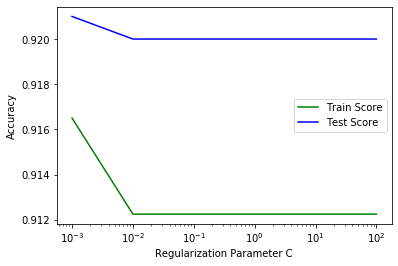

In [51]:
%matplotlib inline
plt.plot(c_range, train_score_list, label = 'Train Score', c = 'g')
plt.plot(c_range, test_score_list, label = 'Test Score', c='b')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')

plt.legend()

### GridSearchCV in Kernalized SVM ( linear )

In [55]:
model = SVC(kernel = 'linear')

parameters = {'C' : [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [84]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best SVM parameters(Kernel = Linear) : ', grid_search.best_params_)


Best Cross-validation score: 0.91
Best SVM parameters(Kernel = Linear) :  {'C': 0.001}


In [104]:
best_svm = SVC(C = 0.001, cache_size = 200, gamma = 0.001, kernel = 'linear', verbose = True)

best_svm.fit(X_train,y_train)
y_pred_kernel = best_svm.predict(X_test)

print('Train score: {:.4f} %'.format(best_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_svm.score(X_test, y_test)*100))

KernalizedSVM_f1_score = f1_score(y_test, best_svm.predict(X_test))
print("f1 score: {:.2f}".format(f1_score(y_test, best_svm.predict(X_test))))

[LibSVM]Train score: 91.6250 %
Test score: 92.1000 %
f1 score: 0.94


### CrossValidation in Kernalized SVM ( linear )

In [ ]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(kernal_clf , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))

### Kernel = rbf

In [55]:
train = []
test = []
index = []
c_range = [0.001, 0.01,0.1, 1, 10, 100]
gamma_range = [0.001, 0.01,0.1, 1, 10, 100]

for C in c_range:
    for gamma in gamma_range:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C,gamma))

### GridSearchCV in Kernelized SVM ( rbf )

In [58]:
model = SVC(kernel = 'rbf')

parameters = {'C' : [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

E:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 's

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [60]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best SVM parameters(Kernel = rbf) : ', grid_search.best_params_)

Best Cross-validation score: 0.92
Best SVM parameters(Kernel = rbf) :  {'C': 1}


In [111]:
best_svm = SVC(C = 1, cache_size = 200, gamma = 0.001, kernel = 'rbf', verbose = True)

best_svm.fit(X_train,y_train)
y_pred_kernel = best_svm.predict(X_test)

print('Train score: {:.4f} %'.format(best_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_svm.score(X_test, y_test)*100))

KernalizedSVM_f1_score = f1_score(y_test, best_svm.predict(X_test))
print("f1 score: {:.2f}".format(f1_score(y_test, best_svm.predict(X_test))))

[LibSVM]Train score: 91.6250 %
Test score: 92.2000 %
f1 score: 0.94


### CrossValidation in Kernelized SVM ( rbf )

In [63]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))

Cross-validation scores:
[0.6725  0.68    0.6675  0.69375 0.6675 ]
Mean Cross-Validation Score :  0.67625


## Kernel = poly

In [64]:
train = []
test = []
index = []
c_range = [0.001, 0.01,0.1, 1, 10, 100]
gamma_range = [0.001, 0.01,0.1, 1, 10, 100]

for C in c_range:
    for gamma in gamma_range:
        #create the model
        svc = SVC(kernel = 'poly', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C,gamma))

### GridSearchCV in Kernelized SVM ( poly )

In [65]:
model = SVC(kernel = 'poly')

parameters = {'C' : [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

E:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 's

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [67]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best SVM parameters(Kernel = poly) : ', grid_search.best_params_)

Best Cross-validation score: 0.92
Best SVM parameters(Kernel = poly) :  {'C': 1}


In [109]:
best_svm = SVC(C = 1, cache_size = 200, gamma = 0.01, kernel = 'rbf', verbose = True)

best_svm.fit(X_train,y_train)
y_pred_kernel = best_svm.predict(X_test)

print('Train score: {:.4f} %'.format(best_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_svm.score(X_test, y_test)*100))

KernalizedSVM_f1_score = f1_score(y_test, best_svm.predict(X_test))
print("f1 score: {:.2f}".format(f1_score(y_test, best_svm.predict(X_test))))

[LibSVM]Train score: 93.1250 %
Test score: 91.9000 %
f1 score: 0.94


### CrossValidation in Kernelized SVM ( poly )

In [70]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))

Cross-validation scores:
[0.8575  0.8525  0.87125 0.855   0.8775 ]
Mean Cross-Validation Score :  0.8627499999999999


## Decision Tree 

In [84]:
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.887
Accuracy on training set: 0.935
Accuracy on test set: 0.913


### GridSearchCV on DecisionTree

In [85]:
#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, 

### CrossValidation on DecisionTree

In [54]:
print("Best Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
#Finding Best Parameters
print('Best DecisionTree parameters : ', grid_dtree.best_params_)

Best Cross-validation score: 0.92
Best DecisionTree parameters :  {'max_depth': 3}


In [86]:
best_dtree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)

best_dtree.fit(X_train, y_train)
y_pred_dtree = best_dtree.predict(X_test)

print('Train score: {:.4f}%'.format(best_dtree.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(best_dtree.score(X_test, y_test)*100))

Decision_f1_score = f1_score(y_test, best_dtree.predict(X_test))
print('f1 score : {:.4f} '.format(f1_score(y_test, best_dtree.predict(X_test))))

Train score: 92.9250%
Test score: 92.0000%
f1 score : 0.9419 


### Best Classification Model

Looking at the values of F1_score, Train Score and Test Score of each of the above models we can conclude that, DecisionTree is the best classifier for this dataset with the values of 
* F1_Score = 0.9477 
* Train Score = 92.7250
* Test Score = 92.7

This shows that model genralizes to the testing set really well and since the difference between scores is miniscule, hence overfitting will not be an issue.

Also, since the target variable in our dataset is highly skewed towards one particular category, thus decision tree performs fairly better than other classification models in this case. And therefore we consider F1 Score instead of accuracy as a better indicator of model accuracy.

-----------------------

# <font color='red'> Project Phase 2

### Gaussian Naive Bayes

In [68]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [71]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
print(gnb_clf.score(X_train,y_train))
print(gnb_clf.score(X_test,y_test))

0.8274666666666667
0.8184


## Soft Voting

In [73]:
#Soft voting using logistic regression and Gaussian naive bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [75]:
voting_clf = VotingClassifier(estimators=[('lr', logmodel),('Gaussian',gnb_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Gaussian',
                              GaussianNB(priors=None, var_smoothing=1e-09))],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [76]:
for clf in (logmodel,gnb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.919
GaussianNB 0.826
VotingClassifier 0.851


## Hard Voting

In [77]:
# Hard voting using knn classifier and Gaussian naive bayes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [78]:
voting_clf = VotingClassifier(estimators=[('knn', knn),('Gaussian',gnb_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=39,
                                                   p=2, weights='uniform')),
                             ('Gaussian',
                              GaussianNB(priors=None, var_smoothing=1e-09))],
                 flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)

In [79]:

from sklearn.metrics import accuracy_score
for clf in (knn,gnb_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


KNeighborsClassifier 0.821
GaussianNB 0.826
VotingClassifier 0.812


## Bagging

### Implementing Bagging on Desicion Tree

In [80]:
# Bagging with decision tree and logistic regression

from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [81]:
param_grid = {
    'max_samples' : [0.01, 0.05, 0.10, 0.20, 0.50 ]
}

In [88]:
clf = GridSearchCV(BaggingClassifier(dtree,
                                     n_estimators = 100, bootstrap=True,random_state=0),
                   param_grid, cv=6)
clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=5,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                      

In [89]:
print("Best parameters: {}".format(clf.best_params_))

Best parameters: {'max_samples': 0.05}


In [90]:
y_pred = clf.predict(X_test)

In [91]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.928


In [92]:
clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.93


In [112]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred_tree))

Accuracy :  0.922


### Implementing Bagging on Logistic Regression

In [95]:
bag_log_clf = GridSearchCV(BaggingClassifier(logmodel,
                                     n_estimators = 100, max_features = 8,bootstrap=True, random_state=0),
                   param_grid, cv=6)
bag_log_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                           

In [114]:
y_pred = bag_log_clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.904


In [97]:
bag_log_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_log_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_log_clf.score(X_test, y_test)))

Train score: 0.91
Test score: 0.90


## Pasting

### Implementing Pasting on Desicion Tree

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [75]:
param_grid = {
    'max_samples' : [0.01, 0.05, 0.10, 0.20, 0.50 ]
}
dtree = DecisionTreeClassifier(random_state=0)

In [76]:
clf = GridSearchCV(BaggingClassifier(dtree,
                                     n_estimators = 100, bootstrap = False, random_state=0),
                   param_grid, cv=6)
clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                   

In [77]:
print("Best parameters: {}".format(clf.best_params_))

Best parameters: {'max_samples': 0.05}


In [78]:
y_pred = clf.predict(X_test)

In [79]:
print(accuracy_score(y_test, y_pred))

0.928


In [80]:
clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.93


In [81]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred_tree))

Accuracy :  0.927


### Implementing Pasting on Logistic Regression

In [85]:
logmodel = LogisticRegression()
bag_log_clf = GridSearchCV(BaggingClassifier(logmodel,
                                     n_estimators = 100, max_features = 8,bootstrap = False, random_state=0),
                   param_grid, cv=6)
bag_log_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                           

In [86]:
y_pred = bag_log_clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.903


In [87]:
bag_log_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_log_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_log_clf.score(X_test, y_test)))

Train score: 0.91
Test score: 0.90


## AdaBoost

### Implementing AdaBoost on Decision Tree

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [100]:
dtree_clf = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [101]:
knn_clf = KNeighborsClassifier(13)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [102]:
param_grid = {
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators' : [100,200,300,400,500,600,700]
}

In [103]:
ada_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", random_state=0),param_grid,cv=6)
ada_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=2,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                min

In [104]:
print("Best parameters: {}".format(ada_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_clf.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.93


In [105]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.919


In [106]:
# Best cross-validation score is 0.81 for Decision Tree without Ada-Boost

### Implementing Adaboost on Gaussian Naive Bayes

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [108]:
param_grid = {
    'n_estimators'  : [100,200,300,400,500,600,700],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    
}

ada_clf = GridSearchCV(AdaBoostClassifier(gnb_clf, algorithm="SAMME.R", random_state=0),param_grid,cv=6)
ada_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=GaussianNB(priors=None,
                                                                    var_smoothing=1e-09),
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
print("Best parameters: {}".format(ada_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_clf.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.86


In [111]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.886


## Gradiant Boosting

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [117]:
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

In [118]:
gbr_clf = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,cv=6)
gbr_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [119]:
print("Best parameters: {}".format(gbr_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(gbr_clf.best_score_))

Best parameters: {'max_depth': 2}
Best cross-validation score: 0.93


In [121]:
# Setting MAX_DEPTH=1
gbrt = GradientBoostingClassifier(random_state=0,max_depth=2)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Principal Component Analysis

In [51]:
churn_pca = churn1

In [52]:
X = churn_pca.drop('Churn',axis=1).values
y = churn_pca['Churn'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
#create model
pca = PCA(n_components=0.95,random_state = 42)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [58]:
pca.n_components_

19

In [59]:
pca.explained_variance_

array([0.84210932, 0.36193474, 0.19875828, 0.18608782, 0.17288192,
       0.15676043, 0.15361811, 0.1306386 , 0.12248108, 0.10300614,
       0.0893688 , 0.08230162, 0.06388529, 0.05666819, 0.04628148,
       0.04605515, 0.04206219, 0.0393168 , 0.03481013])

In [60]:
pca.explained_variance_ratio_

array([0.27460146, 0.11802245, 0.06481262, 0.06068094, 0.05637466,
       0.05111764, 0.05009297, 0.04259964, 0.03993957, 0.03358903,
       0.02914206, 0.02683754, 0.02083221, 0.0184788 , 0.01509182,
       0.01501801, 0.01371596, 0.01282072, 0.01135115])

### KNN (after applying PCA)

In [266]:
train_score_array = []
test_score_array = []

for k in range(1,40):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_pca, y_train)
    train_score_array.append(knn.score(X_train_pca, y_train))
    test_score_array.append(knn.score(X_test_pca, y_test))

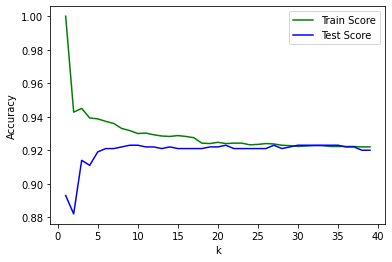

In [267]:
x_axis = range(1,40)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [268]:
param_knn = {'n_neighbors': range(1,20)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train_pca, y_train)

# Best Cross Validation Score
print("Best Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#Calculating the Cross Validation Scores
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_pca, y_train, cv=kfold)))

#Mean Cross Validation Score
scores = cross_val_score(knn , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

#Finding Best Parameters
print('KNN parameters: ', grid_knn.best_params_)

# Checking the test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test_pca,y_test))



Best Cross-validation score: 0.93

Cross-validation scores:
[0.9225 0.9225 0.9225 0.9125 0.9275 0.925  0.9325 0.92   0.91   0.9175]
0.92125
KNN parameters:  {'n_neighbors': 7}
KNN Test Performance:  0.921


In [269]:
knn = KNeighborsClassifier(7)
knn.fit(X_train_pca, y_train)
print('Train Score :',knn.score(X_train_pca, y_train))
print('Test Score :',knn.score(X_test_pca, y_test))

Train Score : 0.936
Test Score : 0.921


In [270]:
kfold = KFold(n_splits=17)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.93644068 0.91525424 0.92372881 0.9279661  0.95338983 0.91489362
 0.91489362 0.94468085 0.94042553 0.89361702 0.94468085 0.91914894
 0.93617021 0.91914894 0.89787234 0.92340426 0.93617021]
0.9259932967056279


In [271]:
knn = KNeighborsClassifier(17)
knn.fit(X_train_pca, y_train)
ypred = knn.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print('F1 Score : ',f)

[[269  16]
 [ 63 652]]
F1 Score :  0.9428778018799711


##### KNN Classification Summary - Before PCA

Train score: 0.9217

Test score: 0.9230

Cross validation score:0.8702

Best parameters: n_neighbors: 9

F1 Score = 0.9380

-----------------

##### KNN Classification Summary - After PCA

Train score: 0.936

Test score: 0.921

Cross validation score:0.93

Best parameters: n_neighbors: 7

F1 Score = 0.9380

### Logistic Regression (after appyling PCA)

In [277]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_pca, y_train)
    log_l2.fit(X_train_pca, y_train)
    train_score_l1.append(log_l1.score(X_train_pca, y_train))
    train_score_l2.append(log_l2.score(X_train_pca, y_train))
    test_score_l1.append(log_l1.score(X_test_pca, y_test))
    test_score_l2.append(log_l2.score(X_test_pca, y_test))

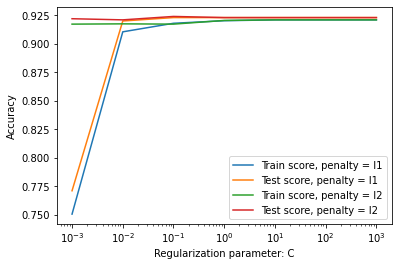

In [278]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [280]:
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [281]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.92


In [283]:
log_l2 = LogisticRegression(penalty = 'l2', C = 10)
#log_l1.fit(X_train, y_train)
log_l2.fit(X_train_pca, y_train)
print('Train Score :',log_l2.score(X_train_pca, y_train))
print('Test Score :',log_l2.score(X_test_pca, y_test))

Train Score : 0.921
Test Score : 0.923


In [285]:
log_l2 = LogisticRegression(penalty = 'l2', C = 10)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l2 , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(log_l2 , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.92353823 0.93403298 0.91154423 0.91754123 0.92042042 0.91741742]
0.9207490849170009


In [286]:
log_l2 = LogisticRegression(penalty = 'l2', C = 10)
log_l2.fit(X_train_pca, y_train)
ypred = log_l2.predict(X_test_pca)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print('F1 Score :',ft)
print(cm)

F1 Score : 0.9435069699192956
[[280  25]
 [ 52 643]]


##### Logistic Regression Summary - Before PCA

Train score: 0.9230

Test score: 0.9240

Cross validation score : 0.92

Best parameters : c = 0.1 

Best parameters : penalty = l1 

F1 Score : 0.94

-----------------

##### Logistic Regression Summary - After PCA

Train score: 0.921

Test score: 0.923

Cross validation score:0.92

Best parameters: c: 10

Best parameters: penalty: l2 

F1 Score : 0.9435

-------------------------

## LinearSVC (after applying PCA)

In [61]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score = []
test_score = []

for i in c_range:
    clf = LinearSVC(C = i)
    clf.fit(X_train_pca,y_train)
    predictions = clf.predict(X_test_pca)
    train_score.append(clf.score(X_train_pca, y_train))
    test_score.append(clf.score(X_test_pca, y_test))

E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [62]:
model = LinearSVC()
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: Co

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [63]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best LinearSVC parameters: ', grid_search.best_params_)


Best Cross-validation score: 0.92
Best LinearSVC parameters:  {'C': 100}


In [64]:
print('Train score: {:.4f}'.format(grid_search.score(X_train_pca, y_train)))
print('Test score: {:.4f} '.format(grid_search.score(X_test_pca, y_test)))

Train score: 0.9150
Test score: 0.9230 


In [333]:
model = LinearSVC()
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(clf , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(model , X_train_pca, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))

E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\base.py:929: Co

Cross-validation scores:
[0.925  0.9125 0.925  0.865  0.91   0.7875 0.9225 0.9025 0.89   0.93  ]
Mean Cross-Validation Score :  0.9157500000000001


In [69]:
svc = LinearSVC(C = 100)
svc.fit(X_train_pca, y_train)
ypred = svc.predict(X_test_pca)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print('F1 Score :',f)

[[283  27]
 [ 49 641]]
F1 Score : 0.9440353460972017


E:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### LinearSVC Summary - before PCA

Train score: 0.9182

Test score: 0.9250

Cross validation score : 0.91

Best parameters : c = 0.01

F1 Score : 0.94

##### LinearSVC Summary - after PCA

Train score: 0.9150

Test score: 0.9230

Cross validation score : 0.92

Best parameters : C = 100

F1 Score : 0.9440

-------------------

### SVM with Kernel = linear (after applying PCA)

In [296]:
train = []
test = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'linear', C = C)
        
        #train the model
        svc.fit(X_train_pca, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train_pca, y_train))
        test.append(svc.score(X_test_pca, y_test))
        


In [297]:
model = SVC(kernel = 'linear')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [298]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 0.92


In [300]:
svc1 = SVC(kernel = 'linear',C = 0.001)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.93103448 0.92653673 0.90854573 0.91604198 0.91441441 0.90990991]
0.9177472074773424


In [306]:
best_svm = SVC(C = 0.001, cache_size = 200, kernel = 'linear', verbose = True)
best_svm.fit(X_train_pca,y_train)
y_pred_kernel = best_svm.predict(X_test_pca)


print('Train score: {:.4f} '.format(best_svm.score(X_train_pca, y_train)))
print('Test score: {:.4f} '.format(best_svm.score(X_test_pca, y_test)))


[LibSVM]Train score: 0.9167 
Test score: 0.9210 


In [307]:
svc = SVC(kernel = 'linear', C = 0.001)
svc.fit(X_train_pca, y_train)
ypred = svc.predict(X_test_pca)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

[[283  30]
 [ 49 638]]
0.9416974169741698


##### Kernel Support Vector Machine  - Linear Summary - before PCA

Train score : 0.9162

Test score : 0.9210

Cross validation score : 0.91

Best parameters : c = 0.001

F1 Score : 0.94

##### Kernel Support Vector Machine  - Linear Summary - after PCA

Train score : 0.9167

Test score : 0.9210

Cross validation score : 0.92

Best parameters : c = 0.001

F1 Score : 0.9416

### SVM with Kernel = rbf (after applying PCA)

In [308]:
train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train_pca, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train_pca, y_train))
        test.append(svc.score(X_test_pca, y_test))
        index.append((C,gamma))

In [309]:
model = SVC(kernel = 'rbf')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [310]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 0.93


In [313]:
best_svm = SVC(C = 1, gamma = 1, cache_size = 200, kernel = 'rbf', verbose = True)
best_svm.fit(X_train_pca,y_train)
y_pred_kernel = best_svm.predict(X_test_pca)


print('Train score: {:.4f} '.format(best_svm.score(X_train_pca, y_train)))
print('Test score: {:.4f} '.format(best_svm.score(X_test_pca, y_test)))


[LibSVM]Train score: 0.9443 
Test score: 0.9220 


In [311]:
svc1 = SVC(kernel = 'rbf',C = 1,gamma = 1)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.92653673 0.92953523 0.92953523 0.91604198 0.93693694 0.91741742]
0.9260005882944413


In [312]:
svc = SVC(kernel = 'rbf', C = 1 , gamma = 1)
svc.fit(X_train_pca, y_train)
ypred = svc.predict(X_test_pca)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

[[265  11]
 [ 67 657]]
0.9439655172413793


##### Kernel Support Vector Machine  - RBF Summary - before PCA

Train score: 0.9162

Test score: 0.9220

Cross validation score : 0.92

Best parameters : c = 1

Best parameters : gamma = 1

F1 Score : 0.94

##### Kernel Support Vector Machine  - RBF Summary - after PCA

Train score: 0.9443

Test score: 0.9220

Cross validation score:0.93

Best parameters: c: 1

Best parameters: gamma: 1 

F1 Score : 0.9439

### SVM with kernel = poly (after applying PCA)

In [314]:
train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'poly', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train_pca, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train_pca, y_train))
        test.append(svc.score(X_test_pca, y_test))
        index.append((C,gamma))

In [315]:
model = SVC(kernel = 'poly')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [317]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.01, 'gamma': 1}
Best cross-validation score: 0.92


In [322]:
best_svm = SVC(C = 0.01, gamma = 1, cache_size = 200, kernel = 'poly', verbose = True)
best_svm.fit(X_train_pca,y_train)
y_pred_kernel = best_svm.predict(X_test_pca)


print('Train score: {:.4f} '.format(best_svm.score(X_train_pca, y_train)))
print('Test score: {:.4f} '.format(best_svm.score(X_test_pca, y_test)))


[LibSVM]Train score: 0.9285 
Test score: 0.9210 


In [320]:
svc1 = SVC(kernel = 'poly',C = 0.01,gamma = 1)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.91904048 0.92353823 0.92053973 0.92053973 0.93093093 0.92042042]
0.9225015870443157


In [321]:
svc = SVC(kernel = 'poly', C = 0.01 , gamma = 1)
svc.fit(X_train_pca, y_train)
ypred = svc.predict(X_test_pca)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

[[268  15]
 [ 64 653]]
0.9429602888086642


##### Kernel Support Vector Machine  - Poly Summary - before PCA

Train score: 0.9312

Test score: 0.9190

Cross validation score:0.92

Best parameters: c: 1

Best parameters: gamma: 0.01

F1 Score : 0.94

##### Kernel Support Vector Machine  - Poly Summary - after PCA

Train score: 0.9285

Test score: 0.9210

Cross validation score:0.92

Best parameters: c: 0.01

Best parameters: gamma: 1 

F1 Score : 0.9429

### Decision Tree (after applying PCA)

In [287]:
param_dtree = {'max_depth': range(1,20)}

In [293]:
dtree_clf = GridSearchCV(DecisionTreeClassifier(random_state=0),param_dtree, cv=5, return_train_score=True)
dtree_clf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=Non

In [294]:
print("Best parameters: {}".format(dtree_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(dtree_clf.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.92


In [295]:
dtree = DecisionTreeClassifier(max_depth=1, min_samples_leaf = 2)
dtree.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

Accuracy on training set: 0.912
Accuracy on test set: 0.911


In [291]:
dtree = DecisionTreeClassifier(max_depth=1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(dtree , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.91454273 0.91304348 0.89805097 0.91004498 0.91441441 0.9024024 ]
0.9204992098545323


In [292]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train_pca, y_train)
ypred = dtree.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[265  22]
 [ 67 646]]
0.9355539464156408


##### Decision tree summary - Before PCA

Train score : 0.9272

Test score : 0.9270

Best Parameters : Max depth = 3

Cross validation score : 0.92

F1 Score : 0.9477

##### Decision tree summary - After PCA

Train score : 0.912

Test score : 0.911

Best Parameters : Max depth = 3

Cross validation score : 0.92

F1 Score : 0.9355

--------------------------------

## Observations after using PCA

After running on the above models, we can confirm that PCA has helped us the improve our models to a certain extent.

The F1 score remains the same for KNN Classifier, it gets increased for Logistic Regression and LinearSVC and SVM a bit. For Decision Tree, the F1 score drops a bit. So now, the best model for our dataset is LinearSVC model with an F1 Score of 0.9440

-----------------------------------------

## Deep Learning Model

### Neural Network

In [88]:
#split data set into train and test
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42)

In [89]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org.astype(float))
X_test = scaler.transform(X_test_org.astype(float))

In [90]:
X_train.shape

(3750, 44)

In [91]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

np.random.seed(100)

In [93]:
# step 1: build the model
model1 = Sequential()
#input leyer
model1.add(Dense(10, input_dim = 44, activation = 'relu'))
#hidden layer
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)

# step 4: model evaluation

Train on 3750 samples
Epoch 1/20
3750/3750 [==============================] - 0s 104us/sample - loss: 0.7179 - accuracy: 0.3989
Epoch 2/20
3750/3750 [==============================] - 0s 10us/sample - loss: 0.6444 - accuracy: 0.7432
Epoch 3/20
3750/3750 [==============================] - 0s 12us/sample - loss: 0.5306 - accuracy: 0.7211
Epoch 4/20
3750/3750 [==============================] - 0s 11us/sample - loss: 0.4081 - accuracy: 0.8957
Epoch 5/20
3750/3750 [==============================] - 0s 12us/sample - loss: 0.3300 - accuracy: 0.9216
Epoch 6/20
3750/3750 [==============================] - 0s 11us/sample - loss: 0.2857 - accuracy: 0.9195
Epoch 7/20
3750/3750 [==============================] - 0s 12us/sample - loss: 0.2619 - accuracy: 0.9200
Epoch 8/20
3750/3750 [==============================] - 0s 10us/sample - loss: 0.2478 - accuracy: 0.9200
Epoch 9/20
3750/3750 [==============================] - 0s 12us/sample - loss: 0.2395 - accuracy: 0.9195
Epoch 10/20
3750/3750 [=========

In [94]:
model1.evaluate(X_train, y_train)

3750/3750 [==============================] - 0s 38us/sample - loss: 0.2220 - accuracy: 0.9216


[0.22198735791047414, 0.9216]

In [95]:
model1.evaluate(X_test, y_test)

1250/1250 [==============================] - 0s 18us/sample - loss: 0.2125 - accuracy: 0.9264


[0.21250177652835847, 0.9264]

In [96]:
y_pred = model1.predict(X_train)

In [97]:
from sklearn.metrics import precision_score
y_train_pred = np.where(y_pred >= 0.5, 1, 0)
precision_score(y_train, y_train_pred)

0.9317919075144508